<a href="https://colab.research.google.com/github/JMGO-coding/MLX_academic_performance/blob/main/src/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *PROJECT TASK*

The goal of practical project is to explain, using all techniques explained in class, the ML
models assigned.
At least each team must explain 2 ML models (a.k.a. compulsory models). Additionally,
the team can build and explain a third model (a.k.a. extra model).

The Practical Project will consist of:

- Python 2 or 3 notebooks: ipynb file for each model.
- Dataset: csv file or online load hardcoded.

Each notebook must include:

- Markdown use:
    - Sections and subsections numbered (using #, ##, etc.)
    - Concise and clear descriptions of the decisions made
    - Concise and clear conclusions of the explanations obtained.

- The code must be clear and must include comments.
- The notebook must include 3 sections (you can add subsections):

1. Dataset load and preparation
2. ML model training
3. ML explanation

The ML explanation, section 3, is the most important part of the project. Here you should
cover:

- Use any explanation method useful that you’ve seen on class.
- Provide individual explanations of instance. Not just plots, but the conclusions
you can make.
- Provide global explanations of the ML model. Not just plots, but the conclusions
you can make.

# Machine Learning Explicable. Explicación de un MODEL_TYPE.

## 0. Requerimientos y funciones auxiliares

In [222]:
%%capture

COLAB = True # TODO: True para ejecutar notebook en Colab
INSTALL = COLAB # TODO: True para instalaciones en Colab

if INSTALL:
    %pip install supertree

In [223]:
CLONE = COLAB
if CLONE:
  !git clone https://github.com/JMGO-coding/MLX_academic_performance.git

fatal: destination path 'MLX_academic_performance' already exists and is not an empty directory.


In [224]:
# Importación de librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
#import supertree

import os
import sys
import datetime

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#from skopt import BayesSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import OneHotEncoder
import sklearn.impute as impute

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import plot_tree

from sklearn.pipeline import Pipeline
from scipy import stats

# Regresión

# Preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.decomposition import PCA

# Desbalanceo
#from imblearn.over_sampling import SVMSMOTE, RandomOverSampler, ADASYN
#from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour
#from imblearn.ensemble import RUSBoostClassifier
#from sklearn.svm import OneClassSVM

# Modelos de clasificación

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBRegressor
import joblib

# TODO: Explicabilidad: SHAP, LIME


In [225]:
# Añadir los directorio fuentes al path de Python
if COLAB:
  sys.path.append('/content/MLX_academic_performance/src')
else:
  sys.path.append('./src')
#sys.path.append('/content/MLX_academic_performance/src')

In [226]:
def save_model(model, model_path="models/best_model_DT.pkl"):
    """
    Guarda un modelo un archivo pkl.
    """
    joblib.dump(model, model_path)

In [227]:
def load_model(model_path="models/best_model_DT.pkl"):
    """
    Carga un modelo previamente guardado desde un archivo.
    """
    return joblib.load(model_path)

## 1. Carga y preprocesamiento del dataset

### 1.1. Primeras visualizaciones y estadísticas

In [228]:
# Fijamos la semilla y los directorios

SEED = 2024
directory = '/content/MLX_academic_performance' if COLAB else '../'
plots_directory = os.path.join(directory, 'plots/')
data_directory = os.path.join(directory, 'data/')

In [229]:
# Lectura del Dataset y primera visualziación

data_file = 'data.csv'
data_path = data_directory + data_file
df= pd.read_csv(data_path, sep=';')
print(df.shape)
df.head()

(4424, 37)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [230]:
df.info()   # Conteo de no-nulos y data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [231]:
df.describe()   # Estadísticos básicos sobre los features numéricos del dataset

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


El dataset no contiene valores nulos.

In [232]:
# Variables según su tipo
qualification_features = ['Previous qualification', 'Mother\'s qualification', 'Father\'s qualification']
thres_features = ['Marital status', 'Application mode', 'Course', 'Mother\'s occupation', 'Father\'s occupation']

categorical_features = thres_features + qualification_features + ['Nacionality']

numerical_features = ['Application order', 'Previous qualification (grade)',
                      'Admission grade', 'Age at enrollment',
                      'Curricular units 1st sem (credited)',  'Curricular units 1st sem (enrolled)',  'Curricular units 1st sem (evaluations)',
                      'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',  'Curricular units 1st sem (without evaluations)',
                      'Curricular units 2nd sem (credited)',  'Curricular units 2nd sem (enrolled)',  'Curricular units 2nd sem (evaluations)',
                      'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',  'Curricular units 2nd sem (without evaluations)',
                      'Unemployment rate', 'Inflation rate', 'GDP'
                    ]
binary_features = ['Daytime/evening attendance\t', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender',
                   'Scholarship holder', 'International']

target_feature = 'Target' # Categorical 3 classes

<ipython-input-233-4cb973522f18>:25: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


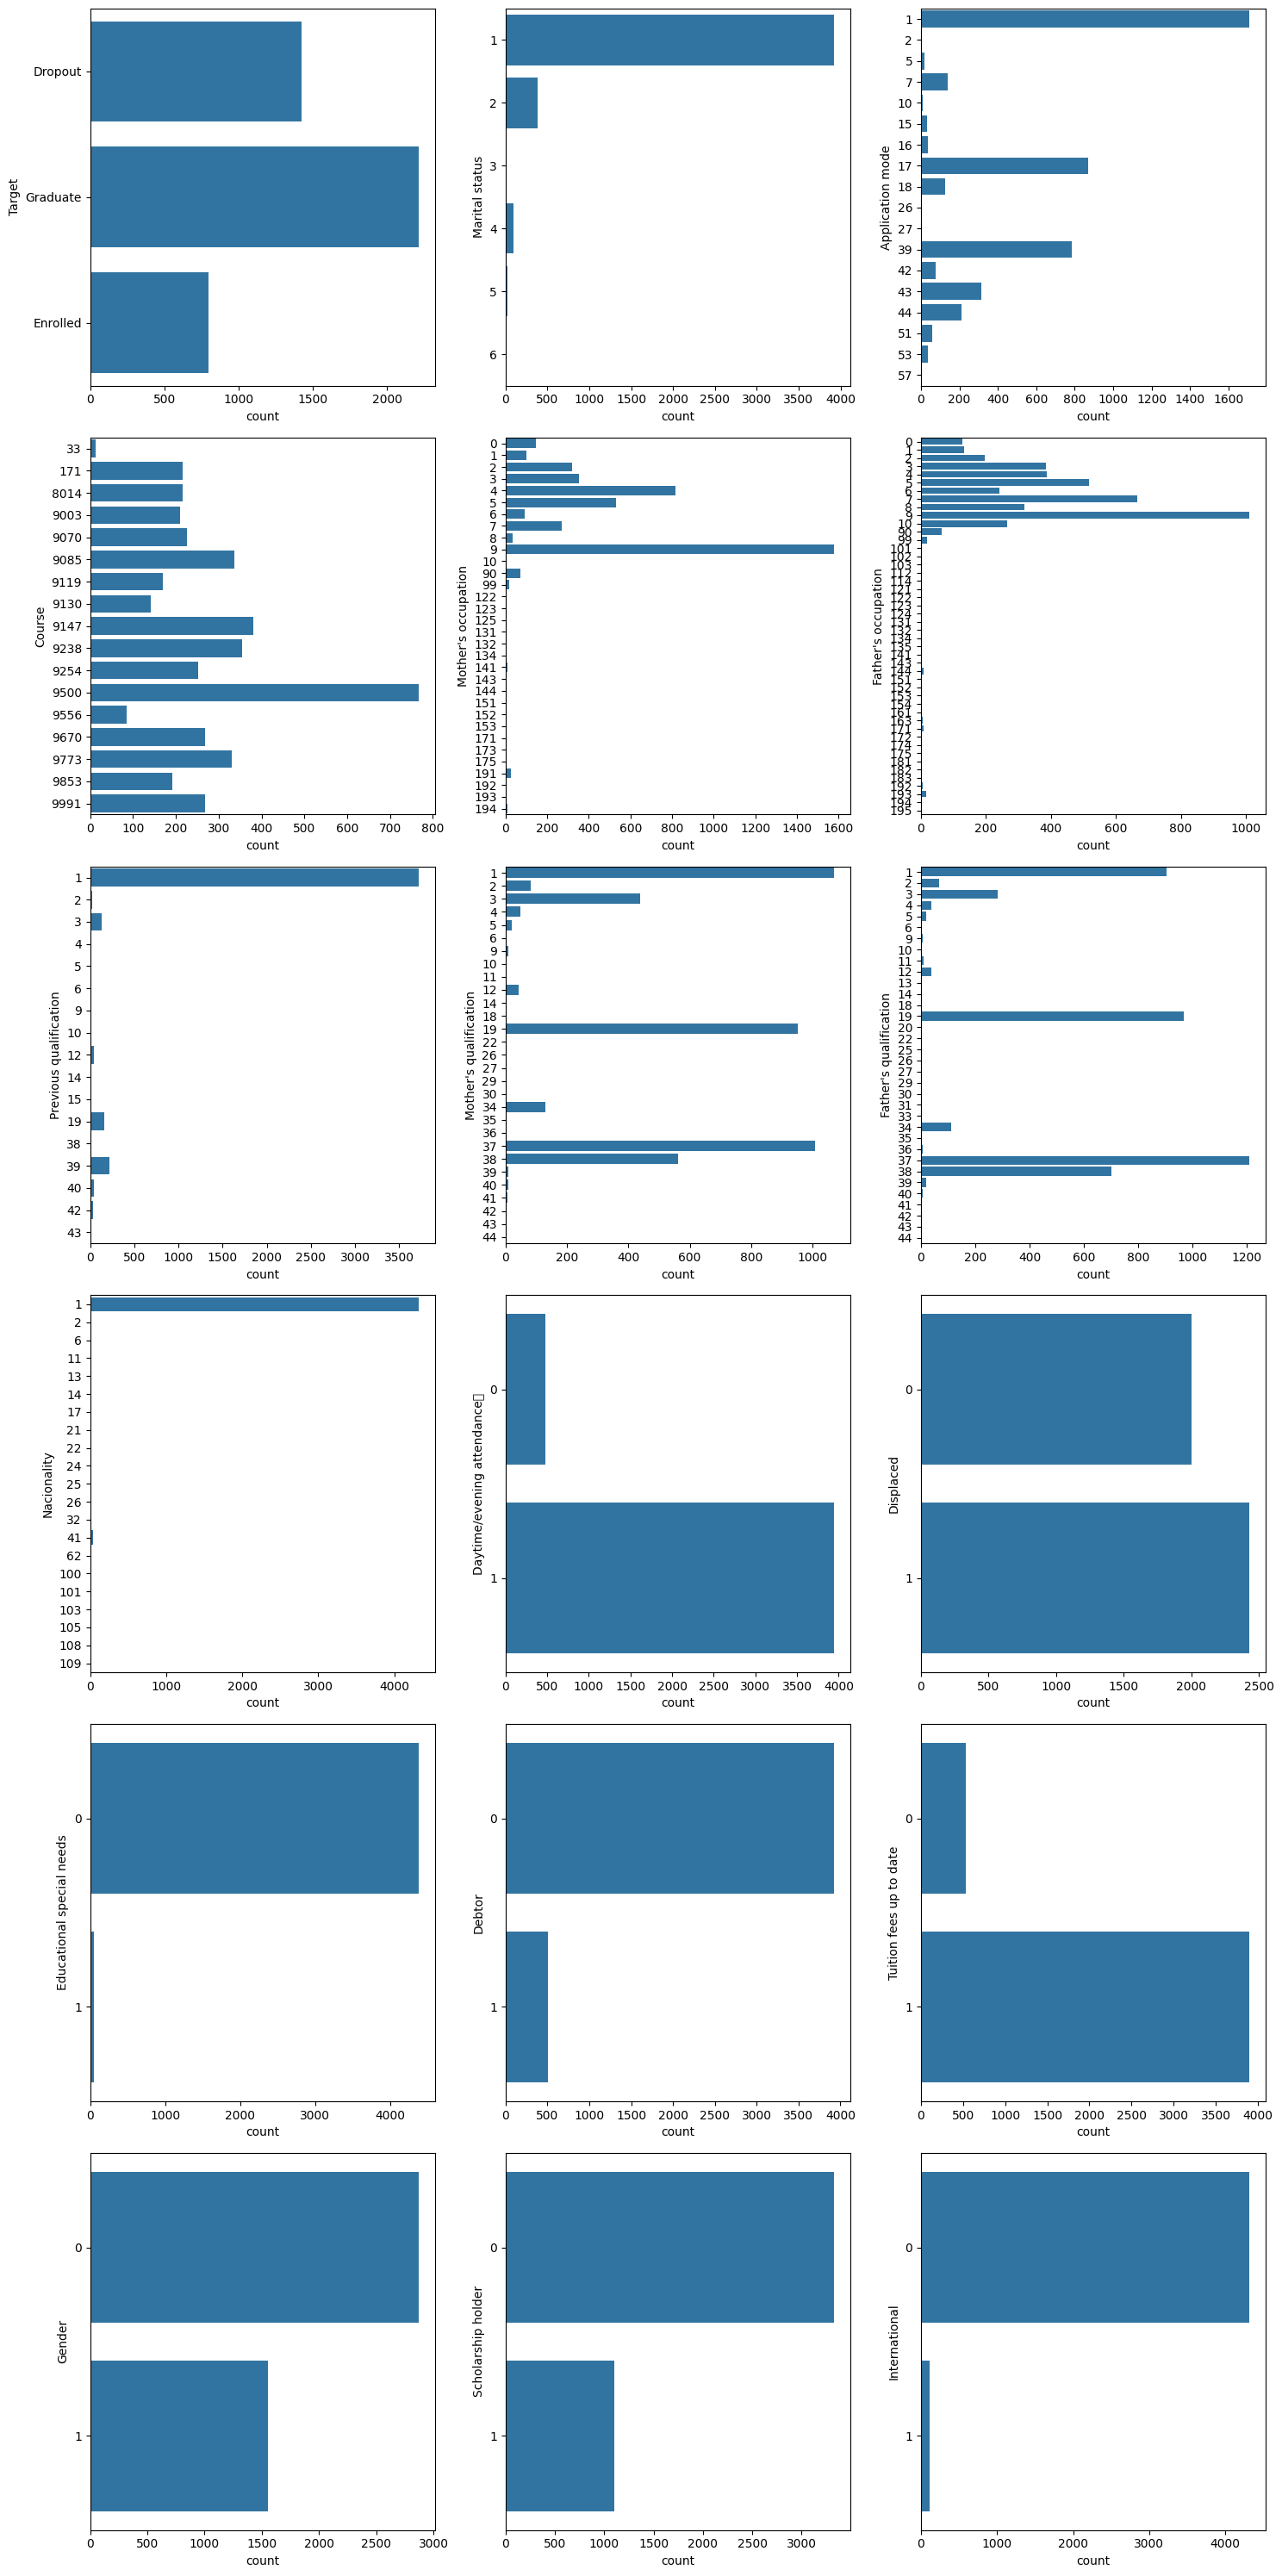

In [233]:
# Histograma variables categóricas

# Calculate number of rows needed for 3 columns
num_features = len([target_feature] + categorical_features + binary_features)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust figsize as needed

# Flatten axes for easier iteration
axes = axes.flatten()

# Iterate through features and plot
feature_index = 0
for feature in [target_feature] + categorical_features + binary_features:
    sns.countplot(y=feature, data=df, ax=axes[feature_index])  # Plot on the current subplot
    feature_index += 1

# Remove empty subplots if any
for i in range(feature_index, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### 1.2. Selección de características

Accuracy: 0.7831


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


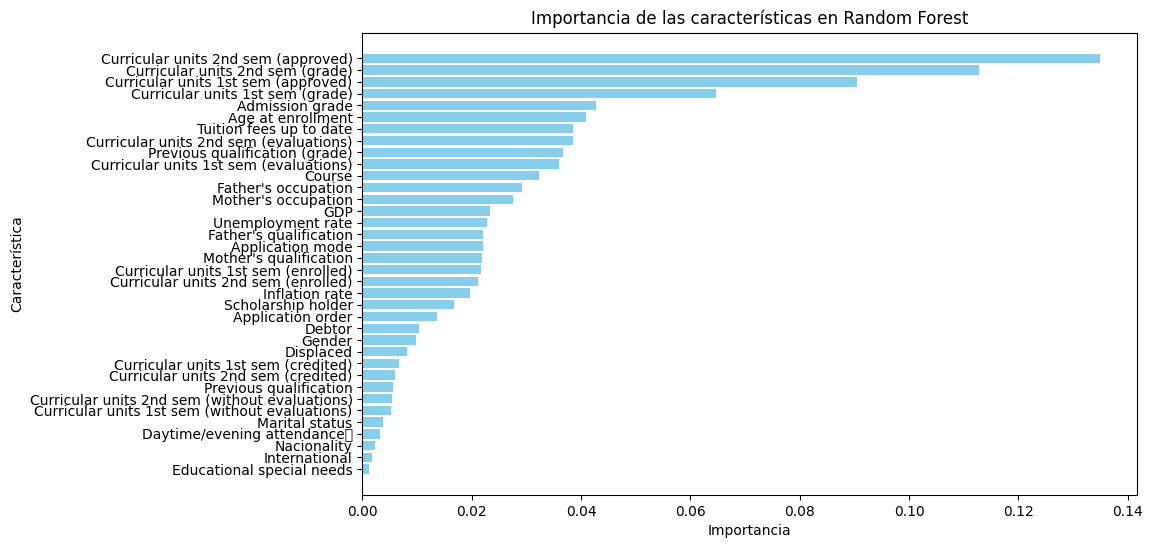

Características seleccionadas: ['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Admission grade', 'Age at enrollment', 'Tuition fees up to date', 'Curricular units 2nd sem (evaluations)', 'Previous qualification (grade)', 'Curricular units 1st sem (evaluations)', 'Course', "Father's occupation", "Mother's occupation", 'GDP', 'Unemployment rate', "Father's qualification", 'Application mode', "Mother's qualification", 'Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)']


In [234]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Definir variables predictoras y objetivo
X = df.drop(columns=['Target']).copy()  # Reemplaza 'target' con el nombre de tu variable objetivo
y = df['Target'].copy()

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Estandarización de los datos (opcional, útil para algunos modelos)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construir el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=SEED)
rf.fit(X_train, y_train)

# Evaluar modelo
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Obtener la importancia de las características
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Visualizar las características más importantes
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.title("Importancia de las características en Random Forest")
plt.gca().invert_yaxis()
plt.show()

# Selección de características más importantes (puedes ajustar el umbral)
selected_features = feature_importances[feature_importances['importance'] > 0.02]['feature'].tolist()
print("Características seleccionadas:", selected_features)


In [235]:
# Filtramos las listas de features tras la seleccion

qualification_features = [feat for feat in selected_features if feat in qualification_features]
thresh_features = [feat for feat in selected_features if feat in thres_features]
categorical_features = [feat for feat in selected_features if feat in categorical_features]
numerical_features = [feat for feat in selected_features if feat in numerical_features]

### 1.3. Transformación de variables categóricas

In [236]:
def transformar_nivel_estudios(valor):
    """
    Transforma el nivel de estudios de un número entero a una de las cuatro nuevas categorías.
    """
    no_secundaria = {38, 19, 12, 14, 15, 10, 9, 6}
    secundaria_completa = {1}
    superior_tecnico = {39, 42}
    superior_universitario = {2, 3, 40, 4, 43, 5}

    if valor in no_secundaria:
        return "Incompleta"
    elif valor in secundaria_completa:
        return "Secundaria"
    elif valor in superior_tecnico:
        return "Superior Técnica"
    elif valor in superior_universitario:
        return "Universitaria"
    else:
        return "Otro"

In [237]:
qualification_features = ['Previous qualification', 'Mother\'s qualification', 'Father\'s qualification']

for feature in qualification_features:
  df[feature] = df[feature].apply(transformar_nivel_estudios)

Transformamos algunas variables categóricas con muchas clases:

* Nacionality: la cambiamos por la variable binaria *foreign* donde 0 indica que el estudiante es de nacionalidad portuguesa y 1 que es extranjero.

In [238]:
# Transformar variables enteras a categóricas

if 'Nacionality' in selected_features:
  df['Nacionality'] = df['Nacionality'].astype('category')
  df['foreign'] = df['Nacionality'].map(lambda x: 0 if x == 1 else 1)
  binary_features += ['foreign']
  categorical_features.remove('Nacionality')
  df.drop(columns=['Nacionality'], inplace=True)

Tratamiento de variables categóricas con muchas clases. Opciones:

1. Eliminar
2. Threshold: 5% -> clase other
3. Si las clases están en orden se pueden dejar como numérica.

Pasos para terminar el preprocesamiento:

1. Revisar las features: categóricas, binarias y numéricas. OK.
2. Transformar los atributos a su tipo en python. OK
3. Transformar las variables categóricas. OK
4. Escalar las numéricas: decidir el Scaler.
- Normalizar antes de SVM (usar Pipeline). OK
5. Selección de atributos (?).
- Según feature importance (DT).
6. Técnicas de desbalanceo. X
- Si es fácil copiarlo de ML práctica 1, no es necesario·
7. Organizar el código para que el tratamiento sea el mismo en los 3 modelos y se pueda realizar antes de testear o con instancias generadas aleatoriamente.
8. Con One Hot baja mucho el f1 -> hay muchos más atributos

In [239]:
for feature in categorical_features:
  df[feature] = df[feature].astype('category')

In [240]:
# 5% threshold for categorical features

threshold = 0.05

for feature in thres_features:
  value_counts = df[feature].value_counts(normalize=True)
  if value_counts.max() > threshold:
      df[feature] = df[feature].apply(lambda x: x if value_counts[x] > threshold else 'other')

<ipython-input-241-4cb973522f18>:25: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


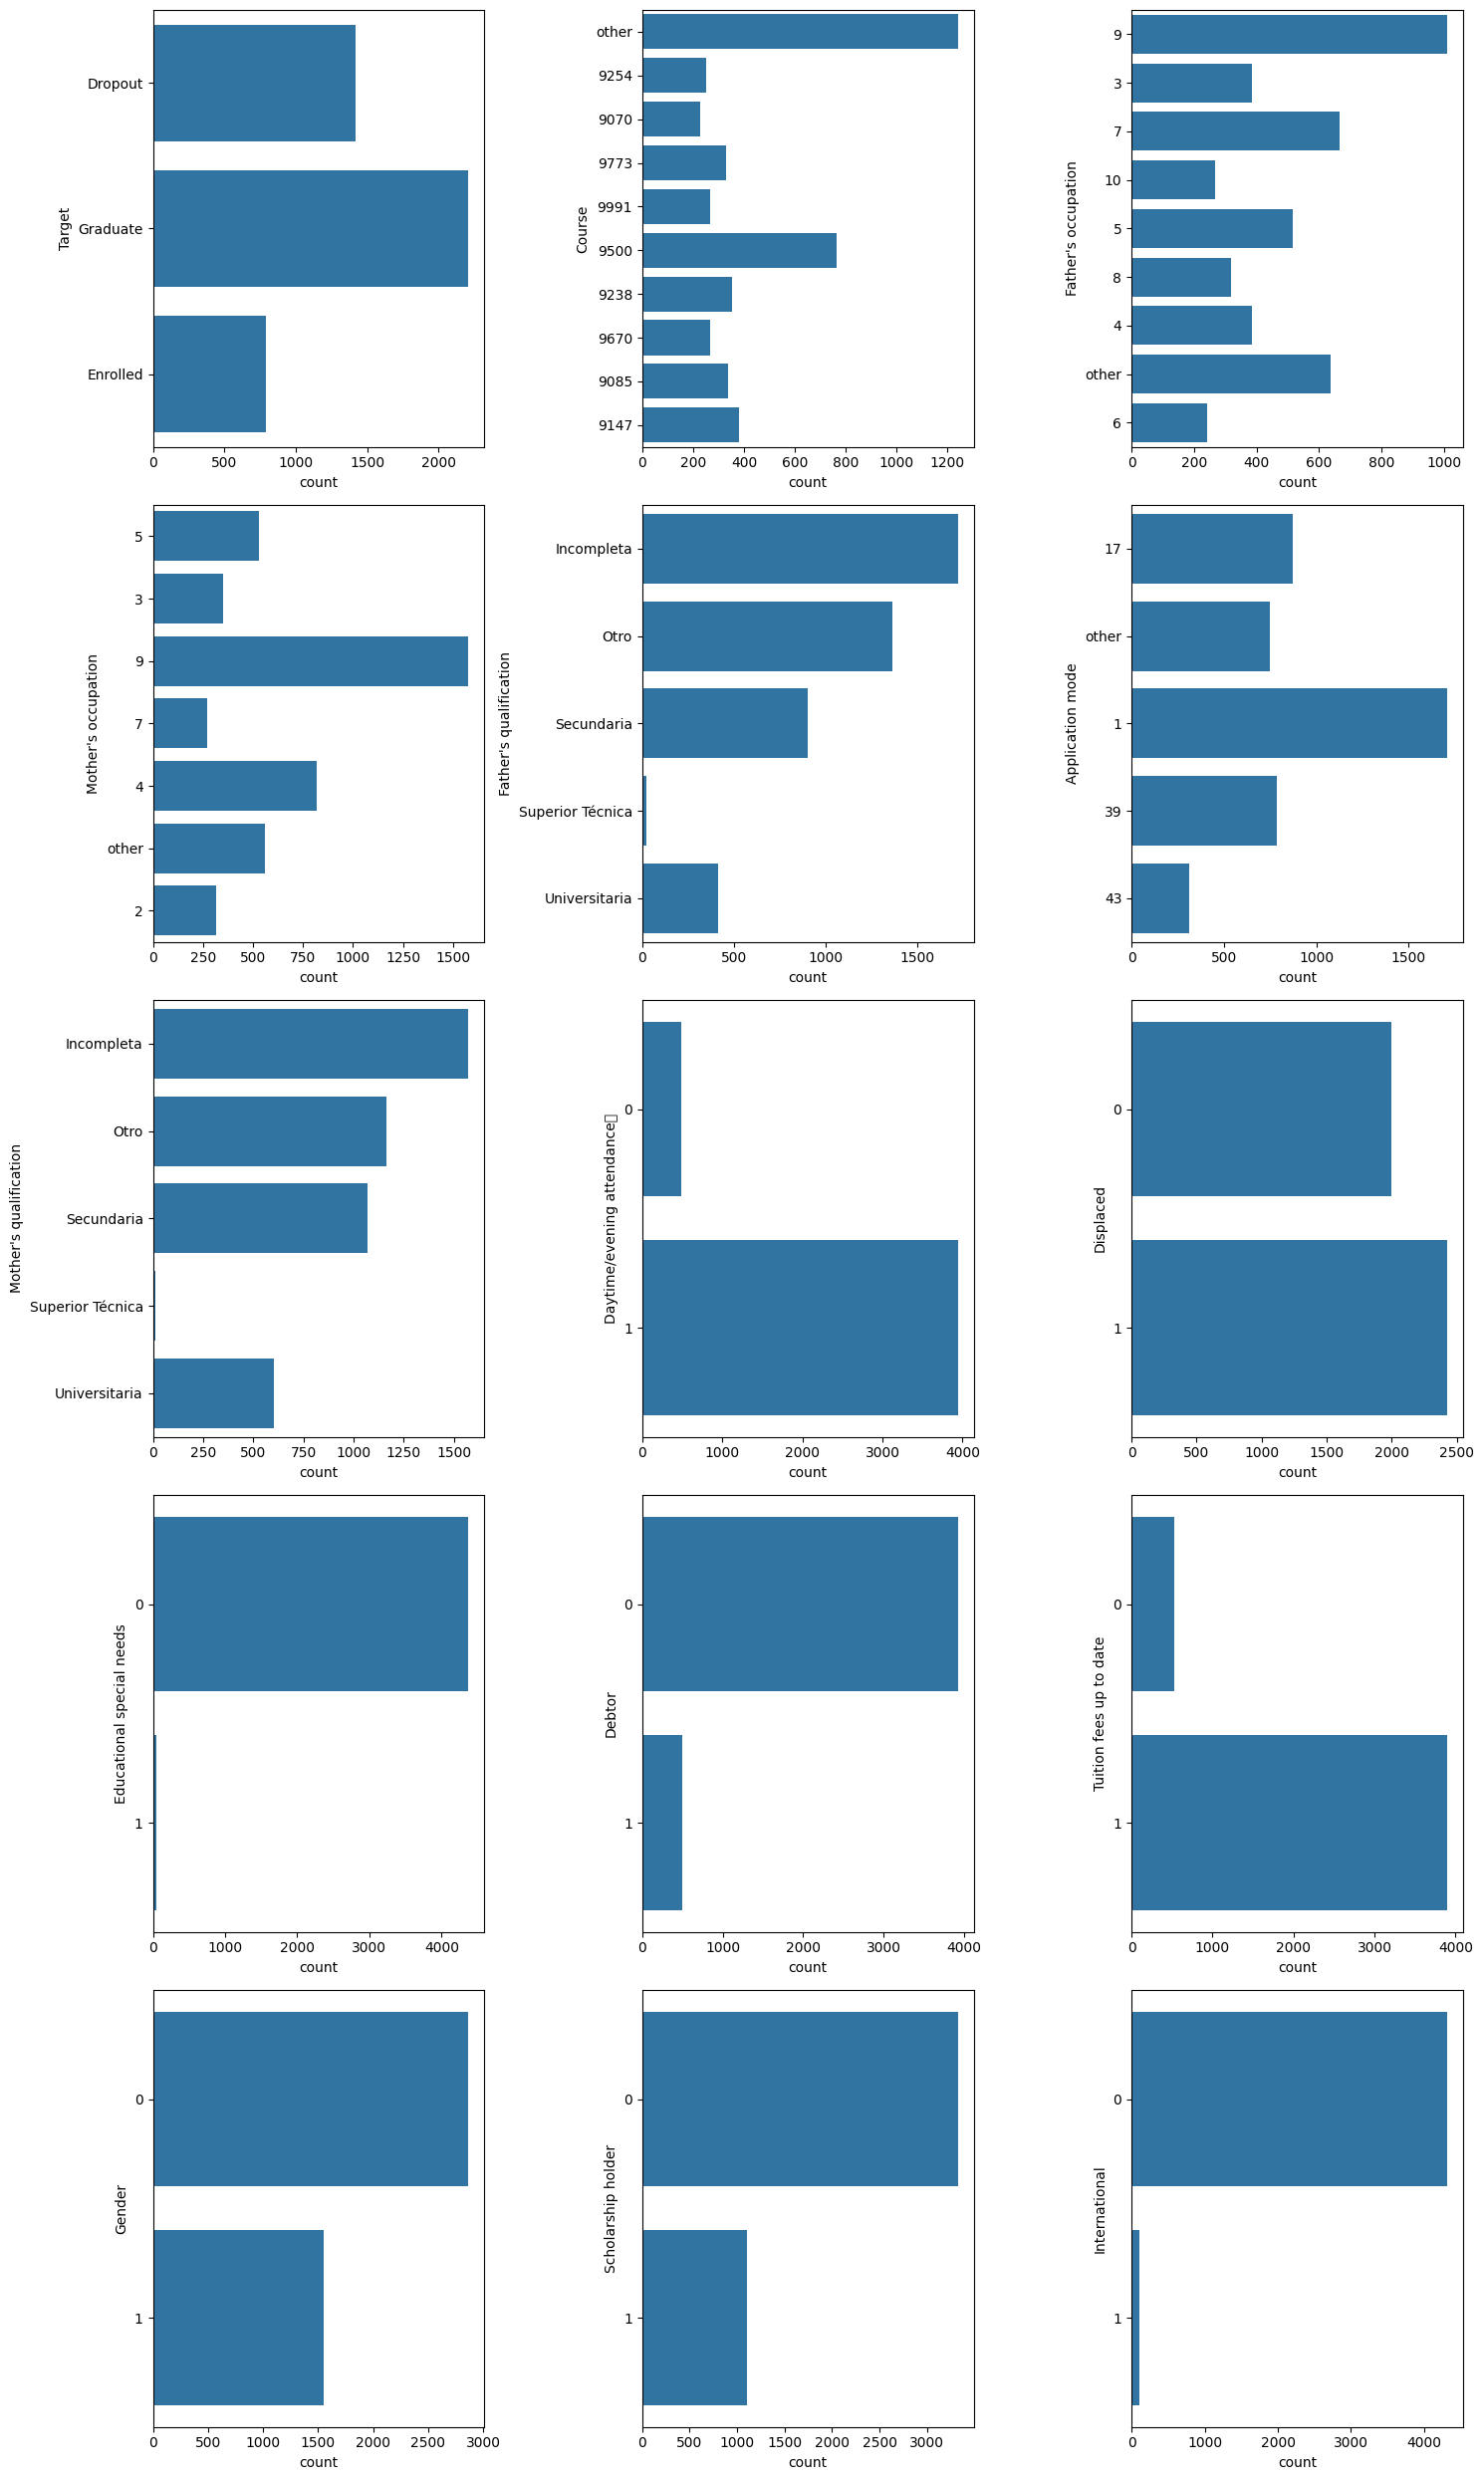

In [241]:
# Histograma variables categóricas

# Calculate number of rows needed for 3 columns
num_features = len([target_feature] + categorical_features + binary_features)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust figsize as needed

# Flatten axes for easier iteration
axes = axes.flatten()

# Iterate through features and plot
feature_index = 0
for feature in [target_feature] + categorical_features + binary_features:
    sns.countplot(y=feature, data=df, ax=axes[feature_index])  # Plot on the current subplot
    feature_index += 1

# Remove empty subplots if any
for i in range(feature_index, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [242]:
for feature in categorical_features:
    df[feature] = df[feature].astype('category') # other

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   object  
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   int64   
 3   Course                                          4424 non-null   category
 4   Daytime/evening attendance	                     4424 non-null   int64   
 5   Previous qualification                          4424 non-null   object  
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nacionality                                     4424 non-null   int64   
 8   Mother's qualification                          4424 non-null   category
 9   Father's qualification        

### 1.4. Visualización de Variables numéricas

<ipython-input-244-cdb2d563b2df>:21: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


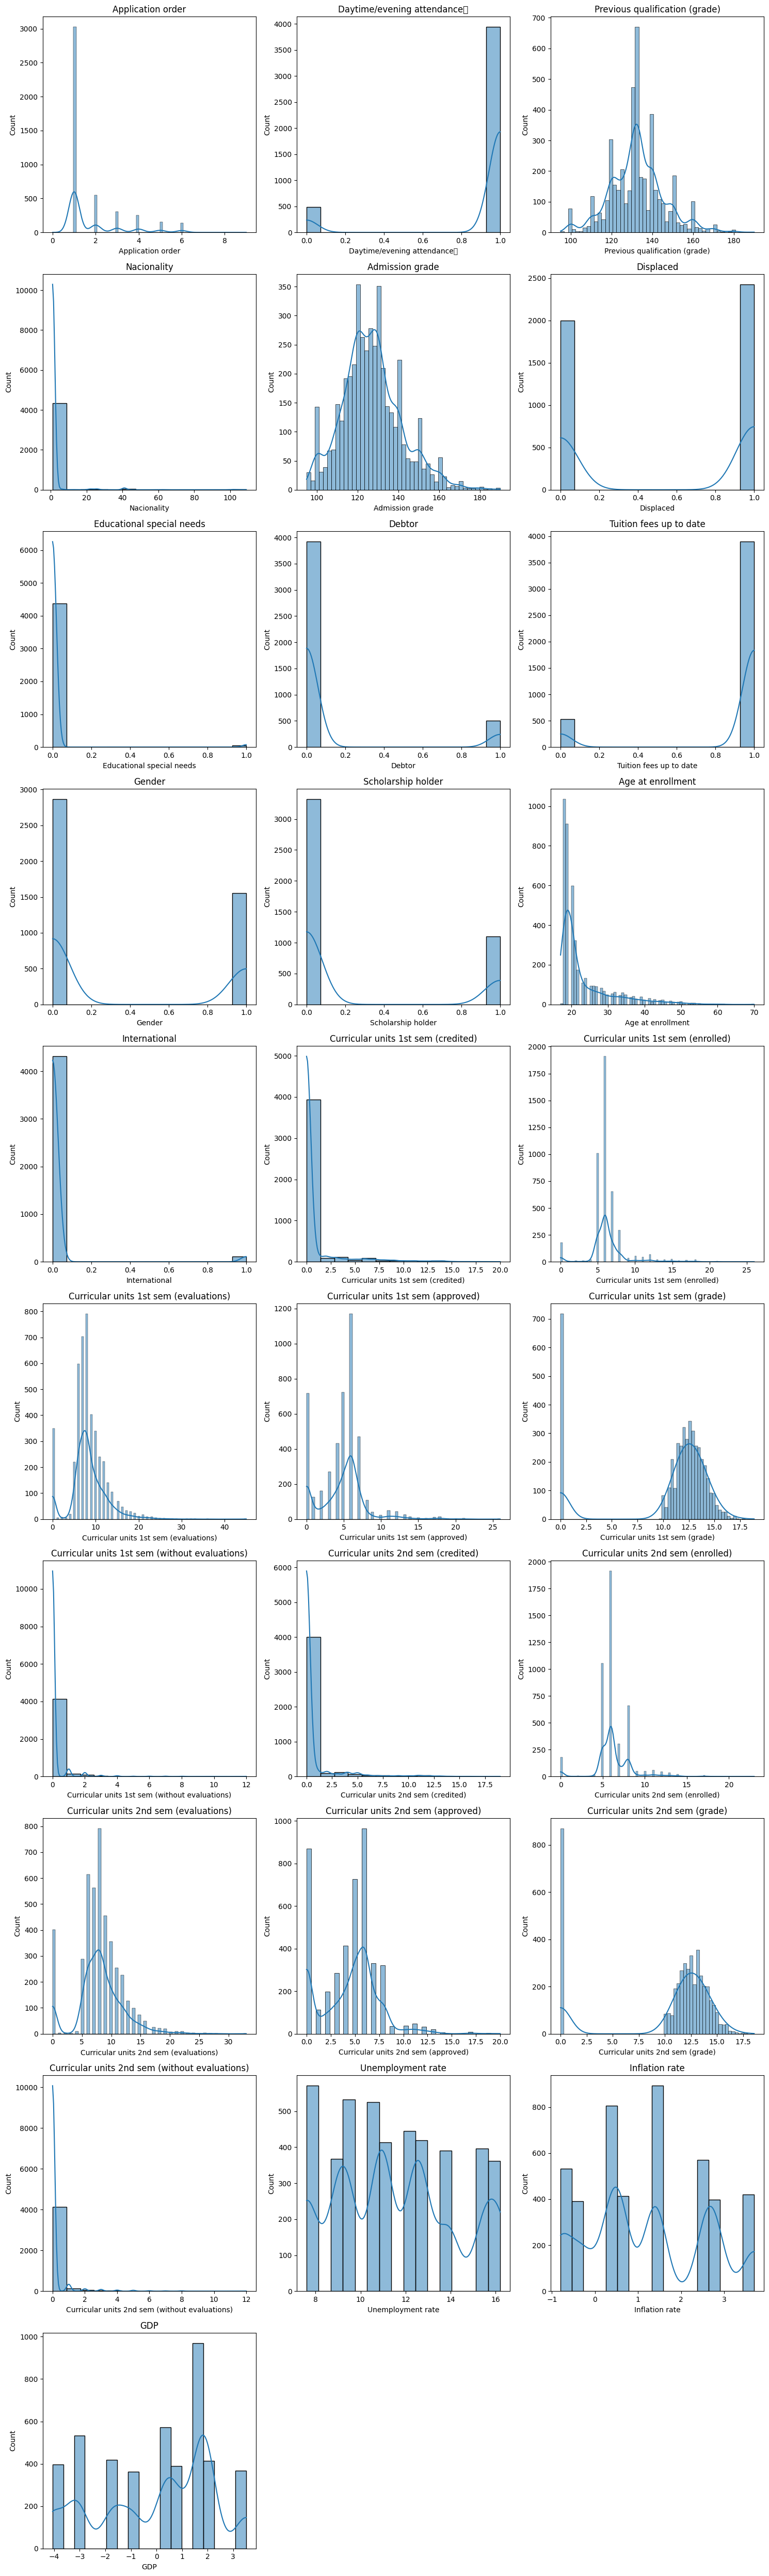

In [244]:
# Lista de características numéricas
numerical_features = df.select_dtypes(include=['number']).columns

# Definir el número de columnas y calcular el número de filas
num_cols = 3
num_rows = math.ceil(len(numerical_features) / num_cols)

# Crear la figura y los ejes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Aplanar para facilitar la iteración

# Graficar cada característica
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(feature)

# Eliminar ejes vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 1.5. partición de los datos en *Train* y *Test*

In [245]:
print(df.columns)
new_cols = selected_features + ['Target']
df = df[new_cols]

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Curricular units 2nd sem (approved)     4424 non-null   int64   
 1   Curricular units 2nd sem (grade)        4424 non-null   float64 
 2   Curricular units 1st sem (approved)     4424 non-null   int64   
 3   Curricular units 1st sem (grade)        4424 non-null   float64 
 4   Admission grade                         4424 non-null   float64 
 5   Age at enrollment                       4424 non-null   int64   
 6   Tuition fees up to date                 4424 non-null   int64   
 7   Curricular units 2nd sem (evaluations)  4424 non-null   int64   
 8   Previous qualification (grade)          4424 non-null   float64 
 9   Curricular units 1st sem (evaluations)  4424 non-null   int64   
 10  Course                                  4424 non

In [247]:
X = df.drop(columns=['Target'])
y = df['Target']
test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=SEED)

In [249]:
X_train.head()

,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Admission grade,Age at enrollment,Tuition fees up to date,Curricular units 2nd sem (evaluations),Previous qualification (grade),Curricular units 1st sem (evaluations),Course,Father's occupation,Mother's occupation,GDP,Unemployment rate,Father's qualification,Application mode,Mother's qualification,Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled)
944,8,16.07500,7,15.285714,122.7,18,1,8,137.0,7,other,7,9,1.79,12.4,Otro,other,Otro,7,8
1237,0,0.00000,1,16.000000,132.4,18,1,5,146.0,5,other,7,7,-3.12,9.4,Otro,other,Secundaria,5,5
3626,2,11.00000,7,11.571429,112.4,26,1,14,119.0,15,other,other,other,0.32,7.6,Otro,17,Otro,7,6
4363,0,0.00000,2,10.500000,115.0,18,1,13,133.1,10,other,other,other,0.32,7.6,Otro,17,Otro,6,6
1224,8,13.57625,8,13.576250,126.5,19,1,8,137.0,8,9500,7,7,-3.12,9.4,Incompleta,1,Incompleta,8,8


### TODO: Selección de características

In [ ]:
selection = False

if selection:
  # Selección de características para la etiqueta actual
  selector = SelectKBest(f_classif, k='all')
  selector.fit(X, y['Target'])

### TODO: Outliers

In [ ]:
outliers = False

if outliers:
  # Creamos un DataFrame con las puntuaciones promediadas
  features_df = pd.DataFrame({
      "Feature": X.columns,
      "Score": selector.scores_
  }).sort_values(by="Score", ascending=False)

  print(features_df)

  # Filtramos por umbral
  threshold = 5  # Puntuación mínima aceptable
  selected_features = features_df[features_df["Score"] > threshold]["Feature"]

  # Creamos nuevos conjuntos de datos con las características seleccionadas
  X_train = X_train[selected_features]
  X_test = X_test[selected_features]

## 2. Entrenamiento del modelo (Decision Tree)

In [219]:
# Preprocesamiento por tipo de variable
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('binary', FunctionTransformer(lambda x: x if x.ndim > 1 else x[:, None]), binary_features)
])

# Aplicar SMOTE o RandomUnderSampler solo en el conjunto de entrenamiento
#sampler = RandomUnderSampler(random_state=SEED)  # O SMOTE(), SVMSMOTE(), ADASYN()

dt = DecisionTreeClassifier(random_state=SEED)


# Pipeline completo
dt_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier',dt)
])

In [220]:
# Ejecutamos un Grid search y nos quedamos con el modelo de mejores hiperparámetros

param_grid = {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [3, 5, 7, 10, 15, 20, 25, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 5]
    }

grid_search = GridSearchCV(dt_model, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Mejores parámetros:", grid_search.best_params_)
print("F1-score en test:", f1)

ValueError: 
All the 720 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Daytime/evening attendance\t'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_indexing.py", line 364, in _get_column_indices
    col_idx = all_columns.get_loc(col)
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py", line 3812, in get_loc
    raise KeyError(key) from err
KeyError: 'Daytime/evening attendance\t'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py", line 993, in fit_transform
    self._validate_column_callables(X)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py", line 552, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_indexing.py", line 372, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


## 3. Explicación del modelo

Comenzamos visualizando el árbol

In [ ]:
best_tree = best_model.named_steps['classifier']

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(best_tree, class_names=["0","1","2"], filled=True)
plt.ion()
plt.show()

In [ ]:
from supertree import SuperTree

In [ ]:
# Visualizar arbol de decisión con Supertree
from supertree import SuperTree

X_transformed = best_model.named_steps['preprocessor'].fit_transform(X_train)
categorical_features_transformed = best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names_trans = list(categorical_features_transformed) + binary_features
print(feature_names_trans)
target_names = ['Dropout', 'Graduate', 'Enrolled']

print('Tipos de las variables:', type(X_transformed), type(feature_names_trans))

In [ ]:
# Crear el árbol de decisión interactivo con Supertree
X_transformed_dense = X_transformed.toarray()  # Convert to dense numpy array
st = SuperTree(best_tree, X_transformed_dense, y_train, feature_names_trans, target_names)

# Mostrar el árbol de decisión interactivo
st.show_tree()

TODO:

- Buscar Decision Tree que implemente partición por atributos categóricos.
- Documentación parámetro 'criterion' de Decision Tree.
- Selección de variables para evitar demasiados splits.
- Mostrar f1 del train para revisar overfitting.
- Organizar el notebook.

Martes: preguntar DT a Juárez.
Lunes: revisar esta lista.
Martes-Viernes: terminar notebook de DT.
Fin de semana: explicabilidad SHAP/Lime de resto de modelos.